<div style="border:1px solid black; padding:10px 10px;">
    <strong>Numerical Methods in Biomechanics - EPFL (ME-484)</strong><br/>
    A. Terrier - CC BY-NC-SA 4.0 Int.<br/><br/>
    <span style="text-decoration:underline;font-weight:bold;">How to use this notebook?</span>
    <ul style="margin:0;padding:0 0 0 20px;">
    <li>This notebook is made of text cells and code cells. The code cells have to be <strong>executed</strong> to see the result of the program. To execute a cell, simply select it and click on the "play" button (&#9654;) in the tool bar just above the notebook, or type <code>shift + enter</code>. It is important to execute the code cells in their order of appearance in the notebook.</li>
    <li>To improve readability, it can be useful to <strong>hide</strong> cells from the notebook (e.g. long code cells). To hide a cell, select it and click on the blue bar which appears on its left. To make the cell visible again, just click again on the blue bar, or on the three "dots" which represent the collapsed cell.</li></ul>
</div>

# Euler methods to solve IV-ODE
This notebook compares the Euler explicit (forward) and implicit (backward) methods to find approximate solution of Initial Value Ordinary Differential Equations (IV-ODE).

## Initial value problem (Cauchy problem)
Find the function $u(t)$, solution of the ordinary differential equation $u'(t)=f(t, u)$, with initial condition $u(t_0)=u_0$, in the interval $[t_0, t_f]$.

## Euler explicit
The Euler explicit (forward) method can be derived from the Tailor series of $u(t)$ 

$$u(t_n + \Delta t) = u(t_n) + \Delta t \frac{du}{dt}|t_n + O(\Delta t^2)$$

$$ \Rightarrow u_{n+1} \equiv u(t_n + \Delta t) = u_n + \Delta t f(t_n, u_n) + O(\Delta t^2) \approx u_n + \Delta t (
f(t_n,u_n)$$

Starting from the known initial value $u(t_0)=u_0$, the method iteratively finds the values of $u$ at discretized values of $t$ within the interval $[t_0, t_f]$.

## Euler implicit
The Euler implicit method is built on the same way, but based on the estimate of the function $f$ at the step $n+1$.

$$ \Rightarrow u_{n+1} \equiv u(t_n + \Delta t) = u_n + \Delta t f(t_{n+1}, u_{t_{n+1}}) + O(\Delta t^2) \approx u_n + \Delta t f(t_{n+1}, u_{n+1})$$

It may require more calculation, with the inversion of $f$ and potentially nonlinear solving, but it has however the advantage of being inconditionnally stable (for any value of $\Delta t$), conversely to the Euler explicit scheme, which may require much smaller time steps. Depending on the type of problem, it can be an advantageous alternative to the simpler explicit scheme. Both the explicit and implicit Euler methods are first order methods: the global error is proportional to the time step $\Delta t$.

## Example

We try these two methods with the following very simple IV-ODE

$$u′(t) = u(t), \quad u(0) = 1,$$

which has the solution $u(t)=e^{t}$.

The explicit method is trivial here

$$u_{n+1}= u_n + \Delta t \ u_n = u_n (1 +\Delta t)$$

The implicit method also requires very litte transformations

$$u_{n+1}=u_n + \Delta t \ u_{n+1} = u_n \frac{1}{1 - \Delta t}$$

Both methods are implemented in the following python script, which also plots the two approximate solutions vs the exact solution, and report the global error (difference between approximation and exact solution at $t_f$). You can test the efect of changing the time step $\Delta t$. The explicit method requires smaller time steps than the implicit one to converge, and provides the required accuracy. Change the time step of both methods, and answer the questions below. 

Explicit: dt = 0.2 , err =  22.650150096081948
Implicit: dt = 0.2 , err =  14.790789005928048


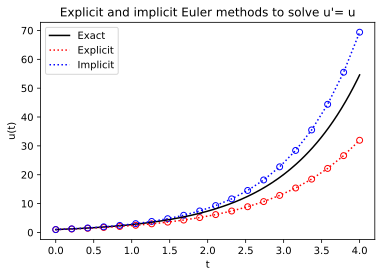

In [11]:
# IV-ODE: Explicit vs implicit Euler
# Solve u'(t) = u(t) with u(0) = 1 and plot solution

import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display, set_matplotlib_formats
set_matplotlib_formats('svg') # vector format for graphs

fig = plt.figure()

t_0 = 0 # Initial time
t_f = 4 # Final time
u_0 = 1 # Solution at initial time t_0

###############################################################################
# Exact solution u(t)
n_t = 150 # Number of subdivisions of the time interval
d_t = (t_f - t_0)/n_t # Time interval
t_a = np.linspace(t_0,t_f,n_t) # Time array with all n_t time increments
u_a = np.zeros ([n_t]) # Solution array with same lenght as time array

for i_t in range(0, n_t):
    u_a[i_t] = np.exp(t_a[i_t])
    
plt.plot(t_a, u_a, 'k', label='Exact')

###############################################################################
# Euler explicit
n_t = 20 # Number of subdivisions of the time interval
d_t = (t_f - t_0)/n_t # Time interval
t_a = np.linspace(t_0,t_f,n_t) # Time array with all n_t time increments
u_a = np.zeros([n_t]) # Solution array with same lenght as time array

u_a[0] = u_0
for i_t in range(0, n_t - 1):
    u_a[i_t + 1] = u_a[i_t] + d_t * (u_a[i_t])

err = abs(u_a[n_t-1] - np.exp(t_f)) # Global error at t_f

print('Explicit: dt =', d_t,', err = ', err)
plt.scatter(t_a, u_a, facecolors='none', edgecolors='r')
plt.plot(t_a, u_a, 'r:', label='Explicit')


###############################################################################
# Euler implicit
n_t = 20 # Number of subdivisions of the time interval
d_t = (t_f - t_0)/n_t # Time interval
t_a = np.linspace(t_0,t_f,n_t) # Time array with all n_t time increments
u_a = np.zeros([n_t]) # Solution array with same lenght as time array

u_a[0] = u_0

for i_t in range(0, n_t - 1):
    u_a[i_t + 1] = u_a[i_t] / (1 - d_t )

err = abs(u_a[n_t-1] - np.exp(t_f)) # Global error at t_f

print('Implicit: dt =', d_t,', err = ', err)
plt.scatter(t_a, u_a, facecolors='none', edgecolors='b')
plt.plot(t_a, u_a, 'b:', label='Implicit')

###############################################################################
plt.title("Explicit and implicit Euler methods to solve u'= u")
plt.xlabel('t')
plt.ylabel('u(t)')
plt.legend()
plt.show()

# Exercice
## Question 1
What are the maximum values of the time step $\Delta t$ to reach a minimum global error of 0.1 in this time interval, for the explicit and implicit Euler methods?
## Question 2
What is the disadvantage of the implicit method
## Question 3
Apply the same method to the ODE $u'(t)=-u(t), \ u(0)=1$.

# Runge-Kutta

The Euler methods can be generalized by the Runge-Kutta method, which is more communly used by most solvers, especially RK4, the fourth-order version of the Runge-Kutta family. With RK4, 4 values of $f(t, u)$ are used for the estimate of $u_{n+1}$. The following Python code use RK4 to solve the same problem as above.

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 32
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.        , 0.10001999, 1.06609106, 2.30431769, 3.64528981,
       4.        ])
 t_events: None
        y: array([[ 1.        ,  1.10519301,  2.9040598 , 10.01740317, 38.29174533,
        54.59513722]])
 y_events: None


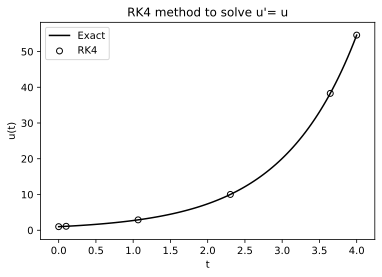

In [3]:
# Python code to sove ODE with RK4

import numpy as np
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
from IPython.display import display, set_matplotlib_formats
set_matplotlib_formats('svg') # vector format for graphs

fig = plt.figure()

###############################################################################
t_0 = 0  # Initial time
t_f = 4  # Final time
u_0 = 1  # Solution at initial time t_0

###############################################################################
# Exact solution u(t)
n_t = 100 # Number if subdivisions of the time interval
d_t = (t_f - t_0)/n_t # Time interval
t_a = np.linspace(t_0,t_f,n_t) # Time array with all n_t time increments
u_a = np.zeros ([n_t]) # Solution array with same lenght as time array

for i_t in range(t_0, n_t):
    u_a[i_t] = np.exp(t_a[i_t])
    
plt.plot(t_a, u_a, 'k', label='Exact')

###############################################################################
# RK4
def f(t,u): return u # Definition of ODE
sol = solve_ivp(f, [t_0, t_f], [u_0])
print(sol)
plt.scatter(sol.t, sol.y[0], facecolors='none', edgecolors='k', label='RK4')

###############################################################################
plt.title("RK4 method to solve u'= u")
plt.xlabel('t')
plt.ylabel('u(t)')
plt.legend()
plt.show()

# IV-ODE solving with Comsol
In Comsol, time dependent problem can solved by  backward differentiation formula (BDF), generalized-$\alpha$ or Runge-Kutta (See chapter "Solution operaton nodes and solvers" in Comsol reference manual). Each methods can present advantages according to the problem. Generalized-$\alpha$ may cause less damping than BDF, and thus be more accurate, but it may also be less stable. Thus, BDF can be more robust for complicated problems. Explicit methods from Runge-Kutta family can be also the most efficient. The Runge-Kutta order can be set between 1 and 4 (default).

# Notbook evaluation
Can you please fill the following survey to help improving this Jupyter notebook?

In [3]:
from IPython.display import IFrame
IFrame('https://www.surveymonkey.com/r/NOTOSURVEY?notebook_set=noto-course-nmbs&notebook_id=survey-euler', 600, 900)